Confusion Matrix:
[[50  2  0  0]
 [10 41  0  0]
 [ 0  2 33  0]
 [ 0  0  0 48]]
Classification Report:
                       precision    recall  f1-score   support

           Normal_ECG       0.83      0.96      0.89        52
   Abnormal_Heartbeat       0.91      0.80      0.85        51
        History_of_MI       1.00      0.94      0.97        35
Myocardial_Infarction       1.00      1.00      1.00        48

             accuracy                           0.92       186
            macro avg       0.94      0.93      0.93       186
         weighted avg       0.93      0.92      0.92       186



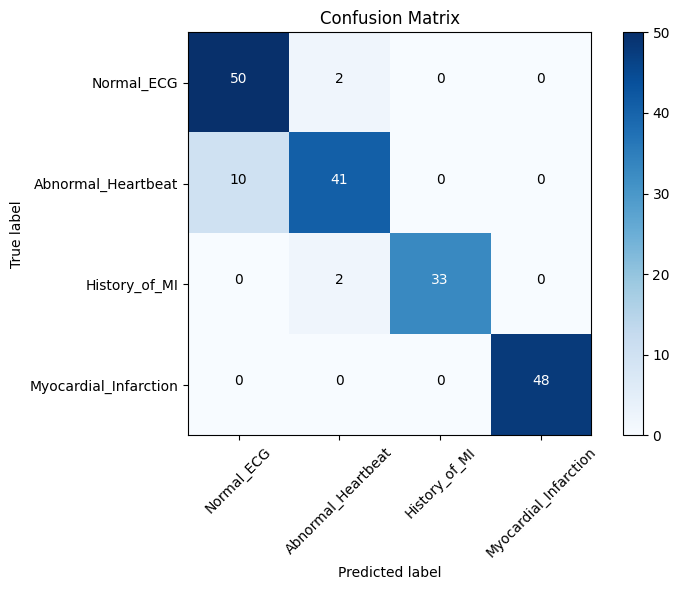

In [8]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Function to load images and labels from the specified directories
def load_data(data_dirs):
    images = []
    labels = []
    class_names = os.listdir(data_dirs[0])  # Get class names from the first directory
    for idx, data_dir in enumerate(data_dirs):
        for img_name in os.listdir(data_dir):
            img_path = os.path.join(data_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            img = cv2.resize(img, (128, 128))  # Resize to a uniform size
            images.append(img.flatten())  # Flatten the image to a 1D array
            labels.append(idx)  # Assign label index based on directory position
    return np.array(images), np.array(labels), class_names

# Load data from directories
data_dirs = [
    r"C:\Users\ashmi\OneDrive\Documents\ecg project\Normal_ECG",
    r"C:\Users\ashmi\OneDrive\Documents\ecg project\Abnormal_Heartbeat",
    r"C:\Users\ashmi\OneDrive\Documents\ecg project\History_of_MI",
    r"C:\Users\ashmi\OneDrive\Documents\ecg project\Myocardial_Infarction"
]

X, y, class_names = load_data(data_dirs)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)

# Define target names corresponding to your class indices
target_names = ["Normal_ECG", "Abnormal_Heartbeat", "History_of_MI", "Myocardial_Infarction"]

class_report = classification_report(y_test, y_pred, target_names=target_names, labels=[0, 1, 2, 3])

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [11]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation Score: 0.9123798294939235


In [13]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Define your models
rf_model = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=5, min_samples_leaf=1)
svm_model = SVC(probability=True)
dt_model = DecisionTreeClassifier()

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model), 
    ('svm', svm_model), 
    ('dt', dt_model)],
    voting='soft'  # Use soft voting to consider probabilities
)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = voting_clf.predict(X_test)


In [14]:
[]# Required imports
import numpy as np
import os
import cv2
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load data function (you already have this, but ensure it's called here)
def load_data(data_dirs):
    images = []
    labels = []
    class_names = os.listdir(data_dirs[0])  # Assuming all directories have the same classes
    for label, data_dir in enumerate(data_dirs):
        for img_name in os.listdir(data_dir):
            img_path = os.path.join(data_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))  # Resize to uniform size
            images.append(img.flatten())  # Flatten the image to a 1D array
            labels.append(label)  # Use index as label
    return np.array(images), np.array(labels)

# Specify your directories
data_dirs = [
    r"C:\Users\ashmi\OneDrive\Documents\ecg project\Normal_ECG",
    r"C:\Users\ashmi\OneDrive\Documents\ecg project\Abnormal_Heartbeat",
    r"C:\Users\ashmi\OneDrive\Documents\ecg project\History_of_MI",
    r"C:\Users\ashmi\OneDrive\Documents\ecg project\Myocardial_Infarction"
]

# Load your dataset
X, y = load_data(data_dirs)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models
rf_model = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=5, min_samples_leaf=1)
svm_model = SVC(probability=True)
dt_model = DecisionTreeClassifier()

# Fit individual models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model), 
    ('svm', svm_model), 
    ('dt', dt_model)],
    voting='soft'  # Use soft voting to consider probabilities
)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[50  2  0  0]
 [ 1 48  1  1]
 [ 2  0 33  0]
 [ 0  0  0 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.96      0.94      0.95        51
           2       0.97      0.94      0.96        35
           3       0.98      1.00      0.99        48

    accuracy                           0.96       186
   macro avg       0.96      0.96      0.96       186
weighted avg       0.96      0.96      0.96       186



In [23]:
import joblib  # or import pickle if you saved with pickle
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix

# Load the saved model
loaded_model = joblib.load('voting_classifier_model.pkl')

# Prepare your test data (ensure it's preprocessed the same way as training data)
# Assuming you have a function `load_data` that loads and preprocesses the data
# Example paths for the test data directories
test_data_dirs = [
    r"C:\Users\ashmi\OneDrive\Documents\cardiovascular_diseases_project\testing\Normal_ECG",
    r"C:\Users\ashmi\OneDrive\Documents\cardiovascular_diseases_project\testing\Abnormal_Heartbeat",
    r"C:\Users\ashmi\OneDrive\Documents\cardiovascular_diseases_project\testing\History_of_MI",
    r"C:\Users\ashmi\OneDrive\Documents\cardiovascular_diseases_project\testing\Myocardial_Infarction"
]

# Function to load and preprocess test data
def load_data(data_dirs):
    images = []
    labels = []
    for label, data_dir in enumerate(data_dirs):
        for img_name in os.listdir(data_dir):
            img_path = os.path.join(data_dir, img_name)
            # Load and preprocess the image (ensure the same resizing, flattening as training)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))  # Resize to match training
            images.append(img.flatten())  # Flatten to 1D array
            labels.append(label)  # Use the label index
    return np.array(images), np.array(labels)

# Load your test data
X_test, y_test = load_data(test_data_dirs)

# Make predictions on the test data
y_pred = loaded_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[71  1  0  0]
 [ 0 59  0  0]
 [ 1  0 63  0]
 [ 0  0  0 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      1.00      0.99        59
           2       1.00      0.98      0.99        64
           3       1.00      1.00      1.00        53

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



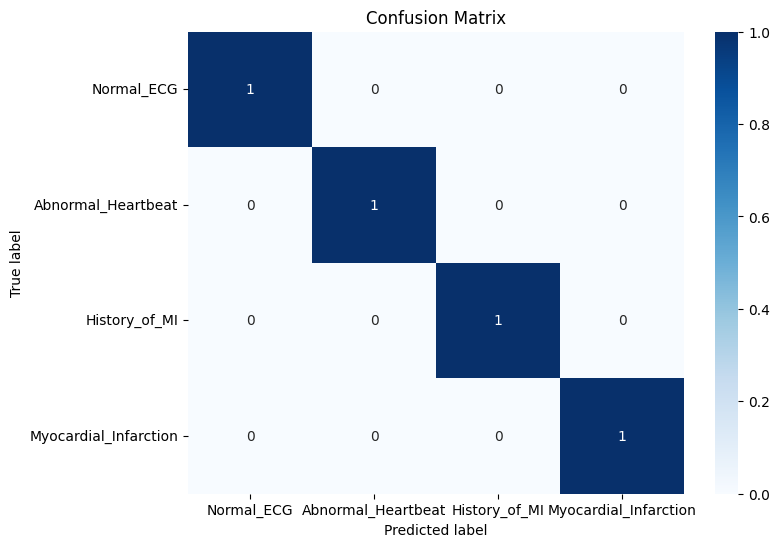

                       precision    recall  f1-score   support

           Normal_ECG       1.00      1.00      1.00         1
   Abnormal_Heartbeat       1.00      1.00      1.00         1
        History_of_MI       1.00      1.00      1.00         1
Myocardial_Infarction       1.00      1.00      1.00         1

             accuracy                           1.00         4
            macro avg       1.00      1.00      1.00         4
         weighted avg       1.00      1.00      1.00         4



In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Replace these with your actual labels
y_true = [0, 1, 2, 3]  # Actual labels
y_pred = [0, 1, 2, 3]  # Predicted labels

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Set class names
class_names = ['Normal_ECG', 'Abnormal_Heartbeat', 'History_of_MI', 'Myocardial_Infarction']

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


In [42]:
import joblib  # or import pickle if you saved with pickle
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix

# Load the saved model
loaded_model = joblib.load('voting_classifier_model.pkl')

# Prepare your test data (ensure it's preprocessed the same way as training data)
# Assuming you have a function `load_data` that loads and preprocesses the data
# Example paths for the test data directories
test_data_dirs = [
    r"C:\Users\ashmi\OneDrive\Documents\cardiovascular_diseases_project\testing\Normal_ECG",
    r"C:\Users\ashmi\OneDrive\Documents\cardiovascular_diseases_project\testing\Abnormal_Heartbeat",
    r"C:\Users\ashmi\OneDrive\Documents\cardiovascular_diseases_project\testing\History_of_MI",
    r"C:\Users\ashmi\OneDrive\Documents\cardiovascular_diseases_project\testing\Myocardial_Infarction"
]

# Function to load and preprocess test data
def load_data(data_dirs):
    images = []
    labels = []
    for label, data_dir in enumerate(data_dirs):
        for img_name in os.listdir(data_dir):
            img_path = os.path.join(data_dir, img_name)
            # Load and preprocess the image (ensure the same resizing, flattening as training)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))  # Resize to match training
            images.append(img.flatten())  # Flatten to 1D array
            labels.append(label)  # Use the label index
    return np.array(images), np.array(labels)

# Load your test data
X_test, y_test = load_data(test_data_dirs)

# Make predictions on the test data
y_pred = loaded_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[71  1  0  0]
 [ 0 59  0  0]
 [ 1  0 63  0]
 [ 0  0  0 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      1.00      0.99        59
           2       1.00      0.98      0.99        64
           3       1.00      1.00      1.00        53

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



In [43]:
[]# Required imports
import numpy as np
import os
import cv2
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load data function (you already have this, but ensure it's called here)
def load_data(data_dirs):
    images = []
    labels = []
    class_names = os.listdir(data_dirs[0])  # Assuming all directories have the same classes
    for label, data_dir in enumerate(data_dirs):
        for img_name in os.listdir(data_dir):
            img_path = os.path.join(data_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))  # Resize to uniform size
            images.append(img.flatten())  # Flatten the image to a 1D array
            labels.append(label)  # Use index as label
    return np.array(images), np.array(labels)

# Specify your directories
data_dirs = [
    r"C:\Users\ashmi\OneDrive\Documents\ecg project\Normal_ECG",
    r"C:\Users\ashmi\OneDrive\Documents\ecg project\Abnormal_Heartbeat",
    r"C:\Users\ashmi\OneDrive\Documents\ecg project\History_of_MI",
    r"C:\Users\ashmi\OneDrive\Documents\ecg project\Myocardial_Infarction"
]

# Load your dataset
X, y = load_data(data_dirs)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models
rf_model = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=5, min_samples_leaf=1)
svm_model = SVC(probability=True)
dt_model = DecisionTreeClassifier()

# Fit individual models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model), 
    ('svm', svm_model), 
    ('dt', dt_model)],
    voting='soft'  # Use soft voting to consider probabilities
)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[50  0  2  0]
 [ 1 46  3  1]
 [ 2  0 33  0]
 [ 0  0  0 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       1.00      0.90      0.95        51
           2       0.87      0.94      0.90        35
           3       0.98      1.00      0.99        48

    accuracy                           0.95       186
   macro avg       0.95      0.95      0.95       186
weighted avg       0.95      0.95      0.95       186



In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import joblib  # or import pickle if you saved with pickle

# Assuming you have trained your model and it's stored in 'optimized_rf_model'

# Save the model to disk with the new name
model_filename = 'ninety_nine_model.pkl'  # Change the model name
joblib.dump(optimized_rf_model, model_filename)

print(f"Model saved to {model_filename}")


NameError: name 'optimized_rf_model' is not defined

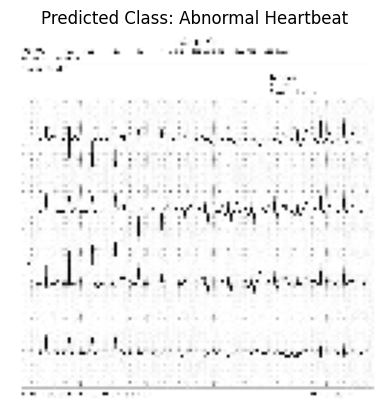

In [7]:
import numpy as np
import cv2
import joblib
import matplotlib.pyplot as plt

# Load the trained model
model = joblib.load('voting_classifier_model.pkl')

# Load and preprocess the image
image_path = r"C:\Users\ashmi\OneDrive\Documents\cardiovascular_diseases_project\testing\Abnormal_Heartbeat\HB(150).jpg"# Update this with the path to your test image
test_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if test_image is None:
    print(f"Error: Image not found at {image_path}")
else:
    test_image_resized = cv2.resize(test_image, (128, 128))  # Resize to a uniform size
    test_image_flattened = test_image_resized.flatten().reshape(1, -1)  # Flatten for prediction

    # Make the prediction
    predicted_class = model.predict(test_image_flattened)

    # Map the predicted class index to class names (make sure you have these defined)
    class_names = ['Normal', 'Abnormal Heartbeat', 'History of Myocardial Infarction', 'Myocardial Infarction']
    predicted_label = class_names[predicted_class[0]]

    # Visualize the test image and prediction
    plt.imshow(test_image_resized, cmap='gray')
    plt.title(f'Predicted Class: {predicted_label}')
    plt.axis('off')
    plt.show()
